<a href="https://colab.research.google.com/github/Karthik-varma-I/Pytorch_basics/blob/main/pytorch_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pytorch WorkFlow
# 1--> data(prepare and load)
# 2--> Build model
# 3--> fitting the model to data
# 4--> making predicitions and evaluting a model
# 5--> saving and loading a model
# 6--> putting it all  together

In [2]:
import torch
from torch import nn # nn contains of all pytorch building blocks for nueral network
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu121'

In [3]:
#create known paramets
weight = 0.75
bias =0.25
#create
s=0
e=2
step=0.05
X=torch.arange(s,e,step).unsqueeze(dim=1)
y=weight * X+bias
print(X,end=" ")
print(y)
print(len(X),len(y))

tensor([[0.0000],
        [0.0500],
        [0.1000],
        [0.1500],
        [0.2000],
        [0.2500],
        [0.3000],
        [0.3500],
        [0.4000],
        [0.4500],
        [0.5000],
        [0.5500],
        [0.6000],
        [0.6500],
        [0.7000],
        [0.7500],
        [0.8000],
        [0.8500],
        [0.9000],
        [0.9500],
        [1.0000],
        [1.0500],
        [1.1000],
        [1.1500],
        [1.2000],
        [1.2500],
        [1.3000],
        [1.3500],
        [1.4000],
        [1.4500],
        [1.5000],
        [1.5500],
        [1.6000],
        [1.6500],
        [1.7000],
        [1.7500],
        [1.8000],
        [1.8500],
        [1.9000],
        [1.9500]]) tensor([[0.2500],
        [0.2875],
        [0.3250],
        [0.3625],
        [0.4000],
        [0.4375],
        [0.4750],
        [0.5125],
        [0.5500],
        [0.5875],
        [0.6250],
        [0.6625],
        [0.7000],
        [0.7375],
        [0.7750],
        [

In [4]:
a=int(0.8 * len(X))
x_train,y_train,x_test,y_test=X[:a],y[:a],X[a:],y[a:]
len(x_train),len(y_train),len(x_test),len(y_test)

(32, 32, 8, 8)

In [5]:
def plot_predicitions(train_data=x_train,
                      train_labels=y_train,
                      test_data=x_test,
                      test_labels=y_test,
                      predictions=None):
  plt.figure(figsize=(4,3))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c="r",s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="g",s=4,label="Predicitons")
  plt.legend(prop={"size":8})

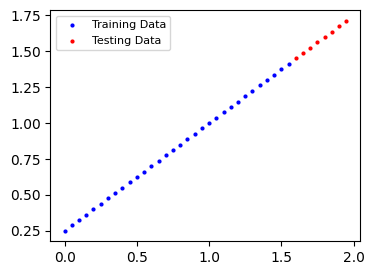

In [6]:
plot_predicitions()

 ## Build linear Regression Model

In [7]:
class Regression_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weight*x+self.bias

In [8]:
torch.manual_seed(42)
model_O=Regression_model()
print(list(model_O.parameters()))
print(model_O.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [9]:
## making predicitions using torch.inference_mode()

In [10]:
with torch.inference_mode():
  y_pred=model_O(x_test)
# with torch.no_grad():
#   y_pred=model_O(x_test)
y_pred

tensor([[0.6675],
        [0.6843],
        [0.7012],
        [0.7180],
        [0.7349],
        [0.7517],
        [0.7685],
        [0.7854]])

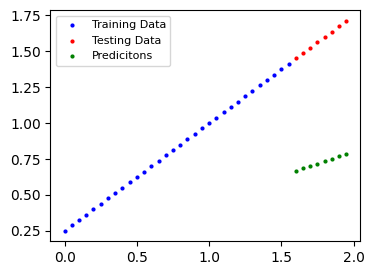

In [11]:
plot_predicitions(predictions=y_pred)  # we need to train our model the predictions values not close the y_test values

In [12]:
#setup the loss function
loss_fn=nn.L1Loss() # torch.mean(torch.abs(y_pred-y_test))
#setup optimizer
optimizer=torch.optim.SGD(params=model_O.parameters(),lr=0.01) #lr-->learning rate
# if small lr results in small changes,a large lr results in large changes

In [13]:
# Building a traning loop

In [14]:
torch.manual_seed(42)
epochs=200
e_cnt,l_values,t_l_values=[],[],[]
for epoch in range(epochs):
  model_O.train()
  y_pred=model_O(x_train)
  loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_O.eval()
  with torch.inference_mode():
    test_pred=model_O(x_test)
    test_loss=loss_fn(test_pred,y_test)
  if epoch % 10==0:
    e_cnt.append(epoch)
    l_values.append(loss)
    t_l_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_O.state_dict())

Epoch: 0 | Loss: 0.4415055513381958 | Test loss: 0.8310589790344238
OrderedDict([('weight', tensor([0.3444])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.2814429998397827 | Test loss: 0.5934963226318359
OrderedDict([('weight', tensor([0.4219])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.14764326810836792 | Test loss: 0.375138521194458
OrderedDict([('weight', tensor([0.4981])), ('bias', tensor([0.3219]))])
Epoch: 30 | Loss: 0.08142808079719543 | Test loss: 0.21693091094493866
OrderedDict([('weight', tensor([0.5633])), ('bias', tensor([0.3644]))])
Epoch: 40 | Loss: 0.05861527472734451 | Test loss: 0.1319153755903244
OrderedDict([('weight', tensor([0.6077])), ('bias', tensor([0.3707]))])
Epoch: 50 | Loss: 0.048395104706287384 | Test loss: 0.09826965630054474
OrderedDict([('weight', tensor([0.6351])), ('bias', tensor([0.3557]))])
Epoch: 60 | Loss: 0.0391034334897995 | Test loss: 0.07598783075809479
OrderedDict([('weight', tensor([0.6586])), ('bias', tensor([0.3363]))])
Epoch: 

In [15]:
with torch.inference_mode():
  y_preds_new=model_O(x_test)

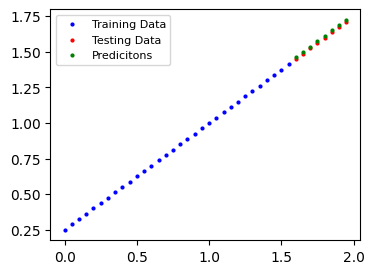

In [16]:
plot_predicitions(predictions=y_preds_new)

In [17]:
from pathlib import Path
model_path=Path("Models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="Pytorch_workflow"
model_save_path=model_path/model_name
print(f"Saving model to:{model_save_path}")
torch.save(obj=model_O.state_dict(),f=model_save_path)

Saving model to:Models/Pytorch_workflow


In [18]:
model_O.state_dict()

OrderedDict([('weight', tensor([0.7520])), ('bias', tensor([0.2588]))])

In [19]:
loaded_model_O=Regression_model()
loaded_model_O.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [20]:
loaded_model_O.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_O(x_test)
loaded_model_preds

tensor([[1.4621],
        [1.4997],
        [1.5373],
        [1.5749],
        [1.6125],
        [1.6501],
        [1.6877],
        [1.7253]])

In [21]:
model_O.eval()
with torch.inference_mode():
  y_preds=model_O(x_test)
y_preds

tensor([[1.4621],
        [1.4997],
        [1.5373],
        [1.5749],
        [1.6125],
        [1.6501],
        [1.6877],
        [1.7253]])

In [22]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])